In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns
from matplotlib.gridspec import GridSpec
import scanpy as sc
import muon as mu
import graphtools
import magic
from matplotlib.pyplot import rc_context
from matplotlib import gridspec
import os


from datashader.mpl_ext import dsshow
import datashader as ds

import matplotlib.colors
cmap = plt.cm.hsv
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../Code/')
from utils import read_dataset_log


/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [5]:
figdir = '../../../Figures/Components'

In [6]:
# For lineage anaysis want to remove signal from activation
harmony_vars = ['Run', 'Biobank_ID', 'Sort_Status']

In [7]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,metadata_fn,...,cnmf_dir,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,...,/data/srlab1/TCAT/Data/PerDataset/AMPRA,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,...,/data/srlab1/TCAT/Data/PerDataset/Pancancer,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,...,/data/srlab1/TCAT/Data/PerDataset/TBRU,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Manua...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Manua...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Activ...,/data/

Kaitlyn's defining CM/EM 

for CCA integrating RNA and protein, I used:

```prots_inc = c("AB_CD27", "AB_CD11a", "AB_CX3CR1", "AB_KLRG1_MAFA", "AB_CD4", "AB_CD8", "AB_CD45RO", "AB_CD45RA", "AB_CD197_CCR7", "AB_CD62L")```

then, I clustered cells on that embedding and used CD62L, CCR7, and CD27 to distinguish CM from EM

# Prepare markers

In [6]:
raw_counts_fn = params.loc['Stimseq', 'raw_counts_fn']
raw_counts_fn

'/data/srlab1/TCAT/Data/PerDataset/Stimseq/raw.mincellfilt.htonegfilt.doubletfilt.h5ad'

In [7]:
outdir = '../../../Data/PerDataset/Stimseq'

In [8]:
adata = sc.read(raw_counts_fn)
# adata.obs['frac_ADT'] = adata.obs['nCount_ADT'] / (adata.obs['nCount_ADT'] + adata.obs['nCount_RNA'])

Only considering the two last: ['.doubletfilt', '.h5ad'].
Only considering the two last: ['.doubletfilt', '.h5ad'].


In [9]:
vc = adata.var['gene_name'].astype(str).value_counts()
todrop = vc.index[vc>1]
todrop

Index(['ARMCX5-GPRASP2', 'GGT1', 'LINC01505', 'TMSB15B', 'LINC01238',
       'CYB561D2', 'MATR3', 'HSPA14', 'GOLGA8M', 'TBCE'],
      dtype='object')

In [10]:
adata.var.index = adata.var['gene_name']
adata = adata[:,~adata.var.index.isin(todrop)]

In [11]:
adata.var['gene_name'].value_counts().head()

A1BG         1
LINC02605    1
LINC02598    1
LINC02599    1
LINC02600    1
Name: gene_name, dtype: int64

In [12]:
ind = adata.var['feature_type']=='Antibody Capture'

/PHShome/dk718/miniforge3/envs/cnmf_env2/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


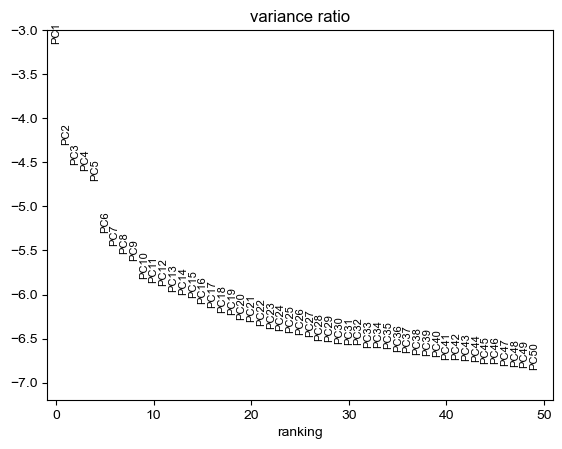

In [13]:
adata_RNA = adata[:,~ind].copy()
sc.pp.highly_variable_genes(adata_RNA, flavor='seurat_v3', n_top_genes=2000)
sc.pp.normalize_per_cell(adata_RNA, counts_per_cell_after=1e4)
sc.pp.log1p(adata_RNA)
sc.pp.scale(adata_RNA, zero_center=False)
sc.tl.pca(adata_RNA, use_highly_variable=True, zero_center=True)
sc.pl.pca_variance_ratio(adata_RNA, log=True, n_pcs=50)

In [14]:
adata_RNA.obs[harmony_vars] = adata_RNA.obs[harmony_vars].astype(str)

In [15]:
sc.external.pp.harmony_integrate(adata_RNA,  harmony_vars, max_iter_harmony = 30)


2023-10-04 02:09:51,349 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-10-04 02:10:02,286 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-10-04 02:10:02,724 - harmonypy - INFO - Iteration 1 of 30
2023-10-04 02:10:18,643 - harmonypy - INFO - Iteration 2 of 30
2023-10-04 02:10:34,610 - harmonypy - INFO - Iteration 3 of 30
2023-10-04 02:10:50,584 - harmonypy - INFO - Converged after 3 iterations


In [16]:
sc.pp.neighbors(adata_RNA, n_neighbors=5, n_pcs=41, use_rep='X_pca_harmony')

In [17]:
outfn = os.path.join(outdir, 'RNA_logTP1K_ForMAGIC.h5ad')
print(outfn)

../../../Data/PerDataset/Stimseq/RNA_logTP1K_ForMAGIC.h5ad


In [18]:
adata_RNA.write(outfn)

Neighbors function kills kernel. Return to whatever this environment issue is later if necessary.

/PHShome/dk718/miniforge3/envs/cnmf_env2/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


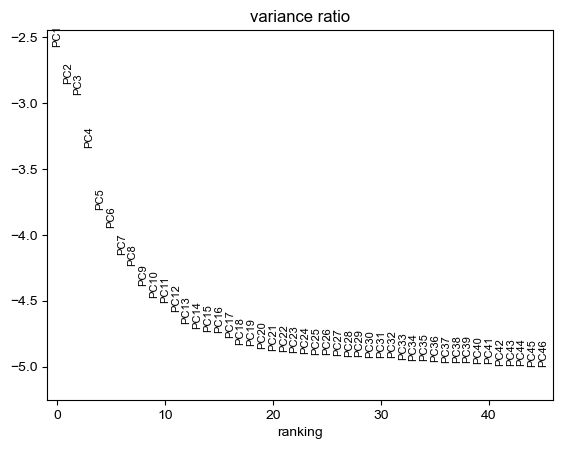

In [19]:
adata_ADT = adata[:,ind].copy()
sc.pp.normalize_per_cell(adata_ADT, counts_per_cell_after=1e4)
Z = adata_ADT.X.todense()
Z[Z==0] = np.nan
gmean = np.exp(np.nansum(np.log(Z+1), axis=1) / Z.shape[1])
Z = np.log((Z / gmean) + 1)
Z[np.isnan(Z)]=0
adata_ADT.X = np.array(Z)

sc.pp.scale(adata_ADT, zero_center=False, max_value=15)

sc.tl.pca(adata_ADT, zero_center=True)
sc.pl.pca_variance_ratio(adata_ADT, log=True, n_pcs=45)

In [20]:
adata_ADT.obs[harmony_vars] = adata_ADT.obs[harmony_vars].astype(str)

In [21]:
sc.external.pp.harmony_integrate(adata_ADT,  harmony_vars, max_iter_harmony = 30)

2023-10-04 02:11:34,055 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-10-04 02:11:45,247 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-10-04 02:11:45,677 - harmonypy - INFO - Iteration 1 of 30
2023-10-04 02:12:01,238 - harmonypy - INFO - Iteration 2 of 30
2023-10-04 02:12:16,888 - harmonypy - INFO - Iteration 3 of 30
2023-10-04 02:12:32,483 - harmonypy - INFO - Iteration 4 of 30
2023-10-04 02:12:48,108 - harmonypy - INFO - Iteration 5 of 30
2023-10-04 02:13:01,585 - harmonypy - INFO - Iteration 6 of 30
2023-10-04 02:13:08,819 - harmonypy - INFO - Iteration 7 of 30
2023-10-04 02:13:15,479 - harmonypy - INFO - Iteration 8 of 30
2023-10-04 02:13:21,318 - harmonypy - INFO - Iteration 9 of 30
2023-10-04 02:13:27,872 - harmonypy - INFO - Converged after 9 iterations


In [22]:
sc.pp.neighbors(adata_ADT, n_neighbors=5, n_pcs=21, use_rep='X_pca_harmony')

In [23]:
outfn = os.path.join(outdir, 'ADT_TP10KCLR_ForMAGIC.h5ad')
print(outfn)

../../../Data/PerDataset/Stimseq/ADT_TP10KCLR_ForMAGIC.h5ad


In [24]:
adata_ADT.write(outfn)

In [25]:
adata_ADT = sc.read(outfn)

/PHShome/dk718/miniforge3/envs/cnmf_env2/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [26]:
adata_ADT.var.index = ['AB_' + x.replace('_prot', '') for x in adata_ADT.var.index]

In [27]:
rna_markers = ['TRAC', 'TRGC1', 'TRDC', 'TRBC1', 'IL2RA', 'FOXP3', 'SELL', 'CCR7', 'KLRB1', 'RTKN2', 'IL7R', 'PASK', 'GATA3',
               'CCR4', 'STAT1', 'IRF4', 'TBX21', 'IFNG', 'CCR5', 'CXCR3', 'CCR6', 'CCL20', 'IL4R', 'IL4', 'STAT4',  'STAT6',  'CCR1', 'IL10',
               'IL17B', 'IL17A', 'IL17F', 'IL17D', 'IL17C', 'RORC', 'RORA', 'STAT3']

In [28]:
set(rna_markers) - set(adata_RNA.var.index)

set()

In [29]:
adt_markers = ['AB_CD3', 'AB_CD4',
               'AB_CD8', 'AB_CD45RA', 'AB_CD45RO',  'AB_CD18', 'AB_CD161',   'AB_CD183_or_CXCR3',

 'AB_CD194_or_CCR4', 'AB_CD195_or_CCR5', 'AB_CD196_or_CCR6',
               
               'AB_CD25', 
               'AB_CD27',
                'AB_TCRVa7.2', 'AB_TCRVd2', 'AB_TCRa_or_b',

               
               'AB_CD31', 'AB_CD62L', 
               'AB_CD38', 'AB_CD39',
              'AB_CD94', 'AB_CD49b', 'AB_CD28'] 

In [30]:
set(adt_markers) - set(adata_ADT.var.index)

set()

In [31]:
adt_markers = list(set(adt_markers).intersection(adata_ADT.var.index))

In [32]:
G = graphtools.Graph(data=adata_RNA.obsp['connectivities'], precomputed='affinity')
magic_operator = magic.MAGIC(t=3)
magic_operator.fit(adata_RNA.X, graph=G)
markers_magic = magic_operator.transform(X=adata_RNA[:, rna_markers].X)
markers_magic = pd.DataFrame(markers_magic, index=adata_RNA.obs.index, columns=rna_markers)

Running MAGIC on 43222 cells and 36581 genes.
Using precomputed graph and diffusion operator...


/PHShome/dk718/.local/lib/python3.8/site-packages/graphtools/base.py:553: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/PHShome/dk718/.local/lib/python3.8/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


Calculating imputation...
Calculated imputation in 0.03 seconds.


/PHShome/dk718/.local/lib/python3.8/site-packages/magic/magic.py:541: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


In [33]:
G = graphtools.Graph(data=adata_ADT.obsp['connectivities'], precomputed='affinity')
magic_operator = magic.MAGIC(t=3)
magic_operator.fit(adata_ADT.X, graph=G)
markers_magic_adt = magic_operator.transform(X=adata_ADT[:, adt_markers].X)
markers_magic_adt = pd.DataFrame(markers_magic_adt, index=adata_ADT.obs.index, columns=adt_markers)

Running MAGIC on 43222 cells and 137 genes.
Using precomputed graph and diffusion operator...
Calculating imputation...
Calculated imputation in 0.03 seconds.


/PHShome/dk718/.local/lib/python3.8/site-packages/graphtools/base.py:553: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/PHShome/dk718/.local/lib/python3.8/site-packages/magic/magic.py:541: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


In [34]:
for g in adt_markers:
    markers_magic[g] = markers_magic_adt[g]
    
# markers_magic['frac_ADT'] = adata.obs['frac_ADT']

In [35]:
outfn = os.path.join(outdir, 'ManualGating.MagicMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv')
print(outfn)

../../../Data/PerDataset/Stimseq/ManualGating.MagicMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv


In [36]:
markers_magic.to_csv(outfn, sep='\t')

In [37]:
markers_magic = pd.read_csv(outfn, sep='\t', index_col=0)

In [38]:
markers_magic.head()

,TRAC,TRGC1,TRDC,TRBC1,IL2RA,FOXP3,SELL,CCR7,KLRB1,RTKN2,...,AB_TCRa_or_b,AB_CD3,AB_CD8,AB_CD195_or_CCR5,AB_CD18,AB_CD94,AB_CD28,AB_CD161,AB_CD183_or_CXCR3,AB_CD194_or_CCR4
3_AAACCTGAGACCGGAT,0.131930,0.000000,0.000000,0.255720,0.368973,0.718621,0.568909,0.531878,0.019873,0.129102,...,1.933961,2.625301,0.292305,2.756294,3.458007,1.266478,2.564082,1.672114,4.578735,1.586527
3_AAACCTGAGAGGGCTT,0.812481,0.000000,0.012781,0.686352,0.097752,0.057966,1.737975,1.674308,0.057397,0.029987,...,3.324193,3.876497,0.301831,2.855416,2.359691,1.005998,3.442754,1.432082,4.814417,0.755072
3_AAACCTGAGAGTCTGG,1.058020,0.099498,0.013209,0.713529,1.899194,0.760849,0.288038,0.888512,0.543551,0.141807,...,1.547268,2.008012,0.304713,3.179703,3.555423,1.160084,2.388715,2.463735,4.708495,0.586808
3_AAACCTGAGCTAGCCC,0.667615,0.007217,0.001677,1.154586,0.155931,0.230222,1.899593,1.604192,0.462994,0.076249,...,2.345336,3.012862,0.205020,2.694213,3.102965,1.298813,2.627179,1.601578,4.944983,0.730188
3_AAACCTGAGCTGCCCA,0.951345,0.009631,0.385666,0.884680,0.294197,0.232879,0.725715,1.240473,0.845008,0.104120,...,1.611610,2.202970,0.217420,3.025695,3.589366,1.262808,2.502963,1.996894,5.155074,1.045875


In [39]:
unsmoothed_markers = pd.DataFrame(np.concatenate([adata_RNA[:, rna_markers].X.toarray(), np.array(adata_ADT[:, adt_markers].X)], axis=1), index=adata_RNA.obs.index,
             columns=(rna_markers+adt_markers))

In [40]:
outfn = os.path.join(outdir, 'ManualGating.UnsmoothedMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv')
print(outfn)

../../../Data/PerDataset/Stimseq/ManualGating.UnsmoothedMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv


In [41]:
unsmoothed_markers.to_csv(outfn, sep='\t')

In [42]:
unsmoothed_markers = pd.read_csv(outfn, sep='\t', index_col=0)

In [43]:
markers = list(markers_magic.columns)

# Protein-RNA correlations

In [44]:
from scipy.stats import pearsonr

In [45]:
prot_pairs = [
              ('CCR4', 'AB_CD194_or_CCR4'),
              ('CCR6', 'AB_CD196_or_CCR6'),
             ('CXCR3', 'AB_CD183_or_CXCR3'), 
              ('SELL', 'AB_CD62L'),
             ('IL2RA', 'AB_CD25'),
             ('FOXP3', 'AB_CD25'),
             ('TRDC', 'AB_TCRVd2'),
             ('TRDC', 'AB_TCRVd2')]

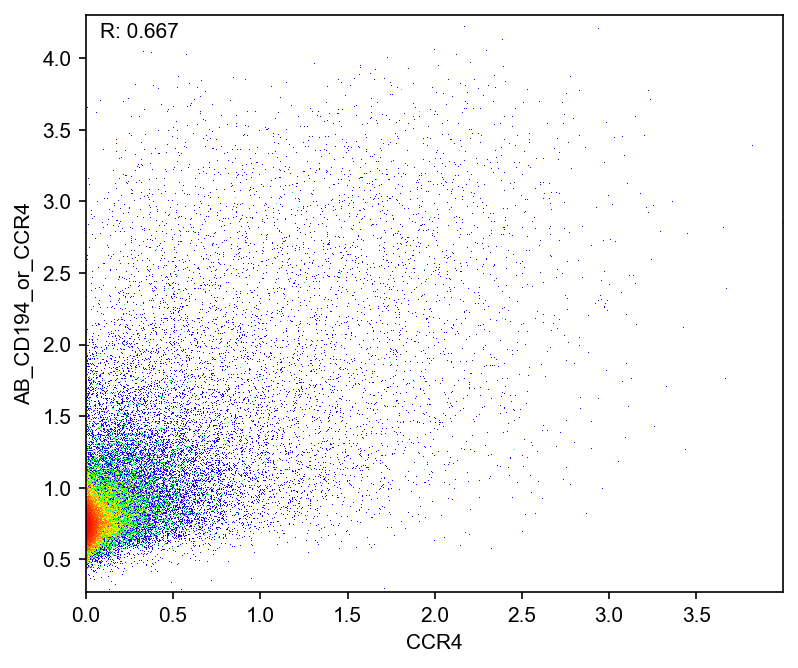

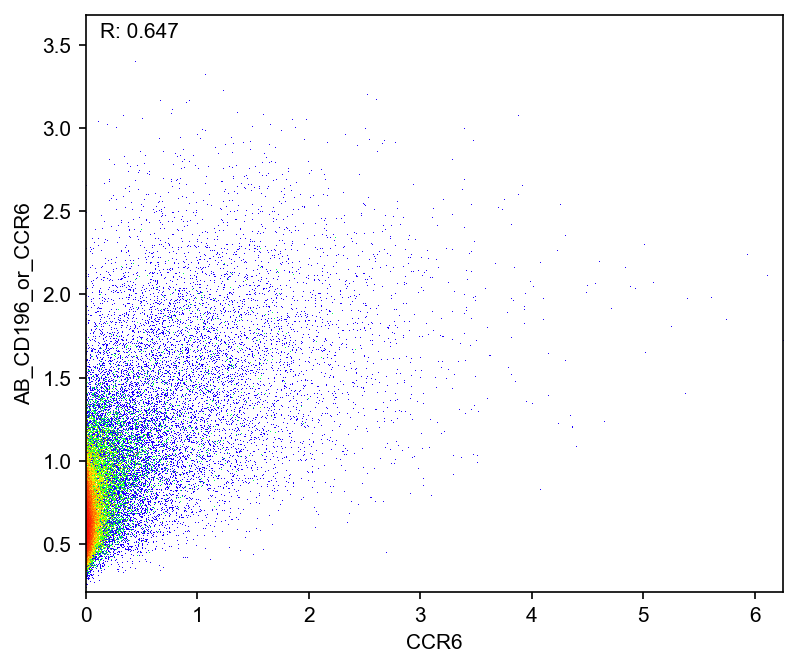

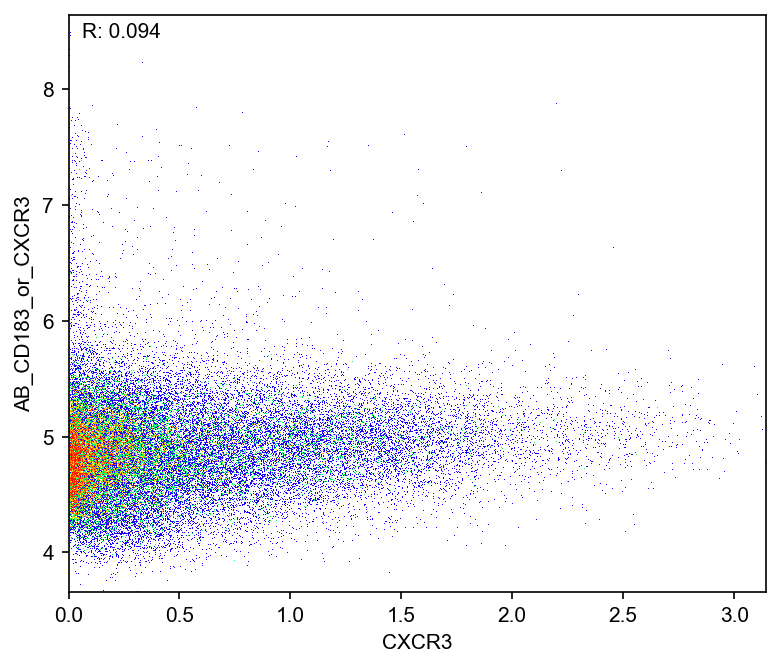

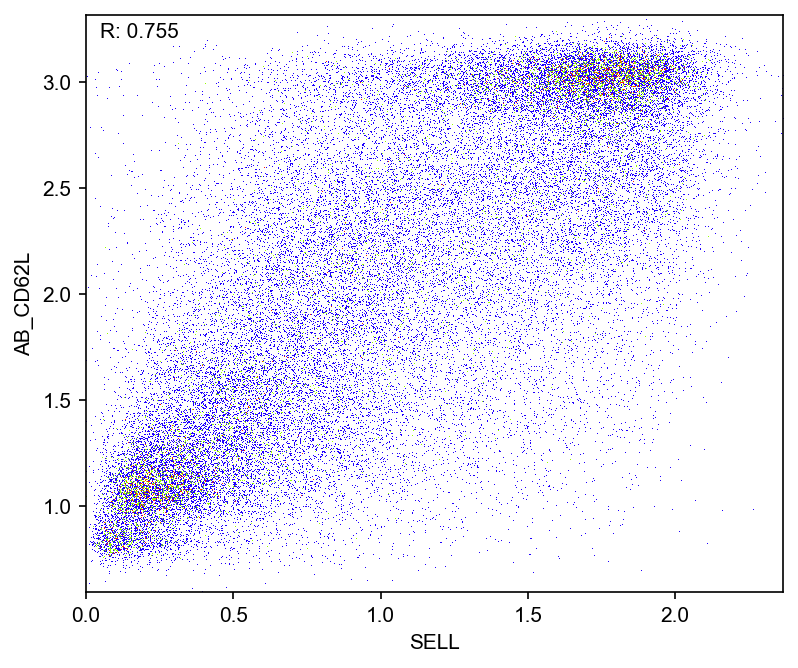

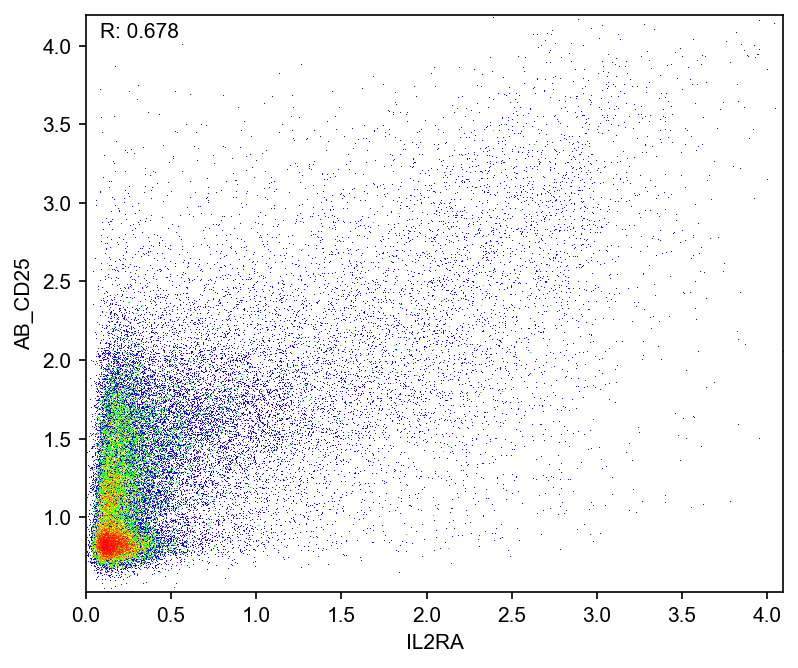

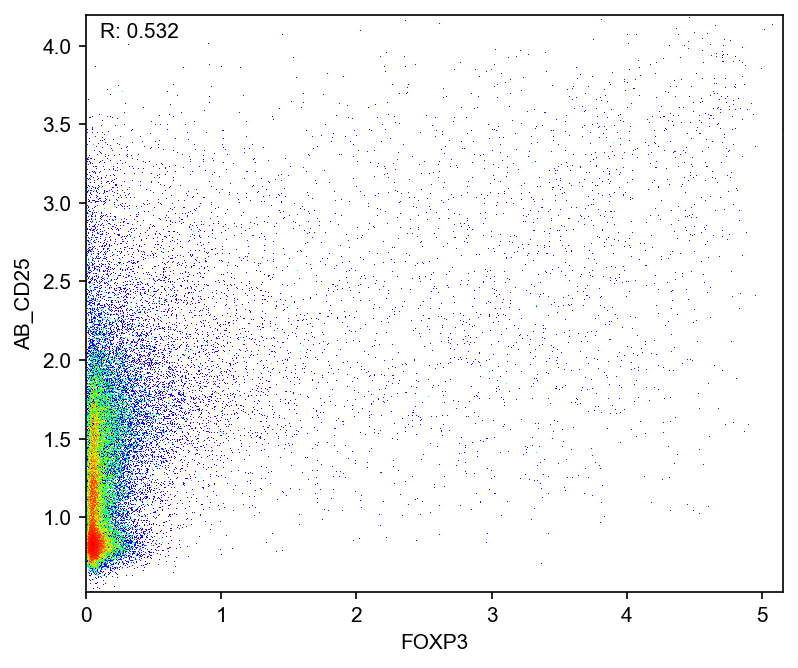

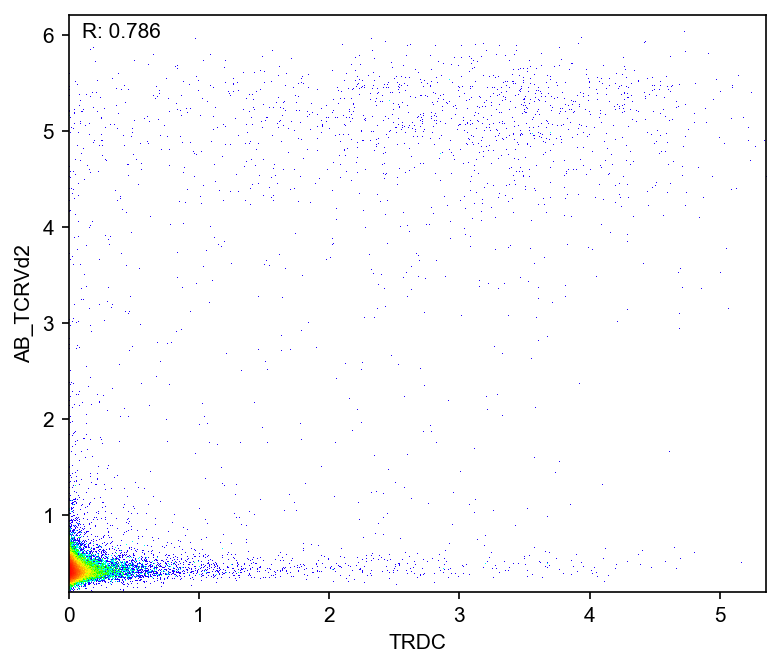

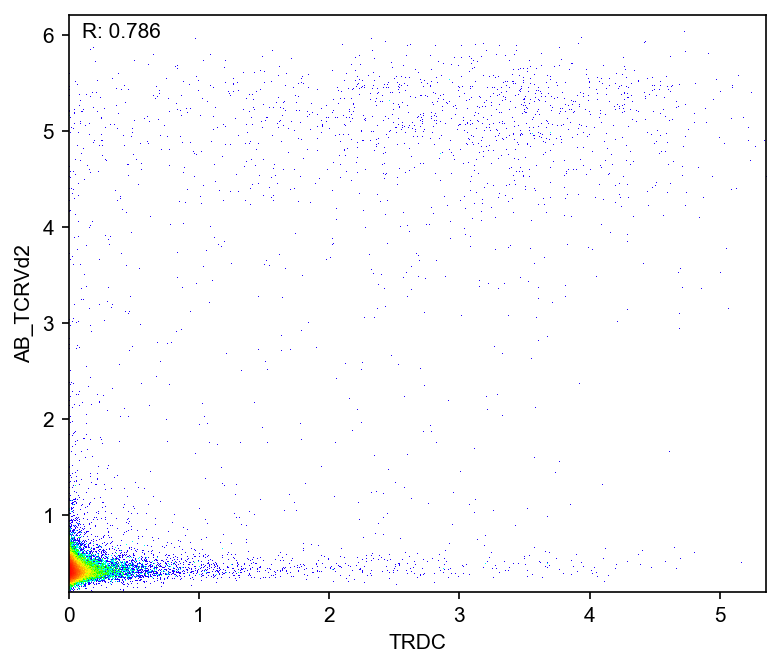

In [46]:
for (gene, prot) in prot_pairs:
    # print(gene, prot)
    r, _ = pearsonr(markers_magic[gene], markers_magic[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':markers_magic[gene], 'y':markers_magic[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(gene)
    ax.set_ylabel(prot)

Compare non MAGIC-smoothed markers


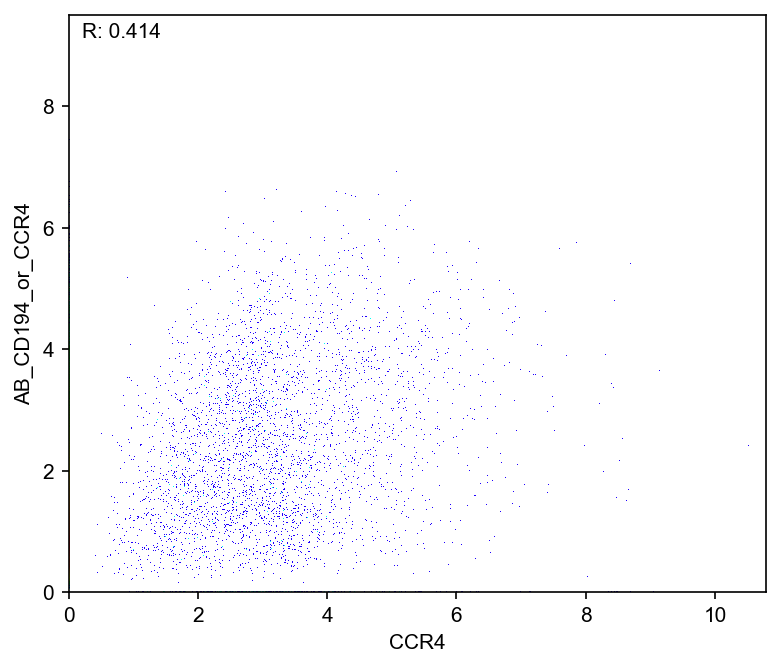

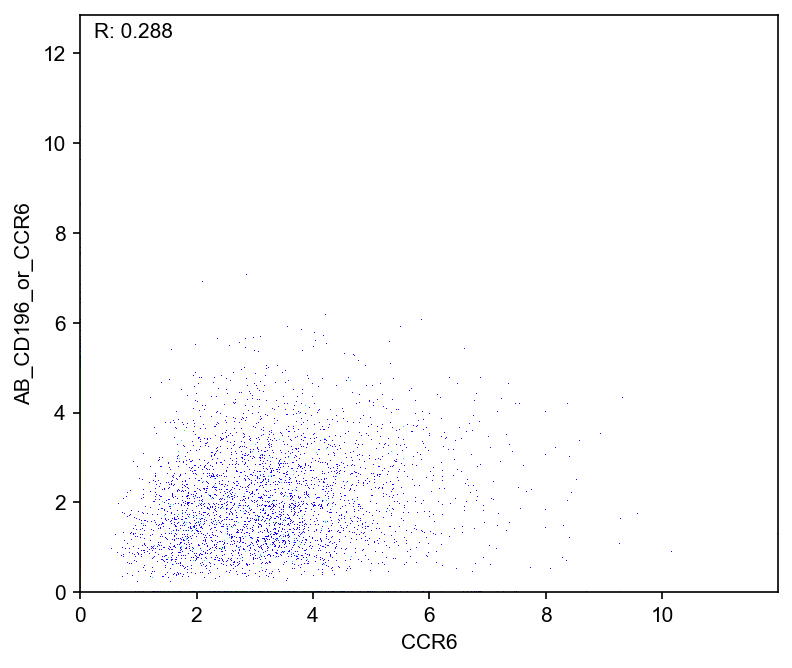

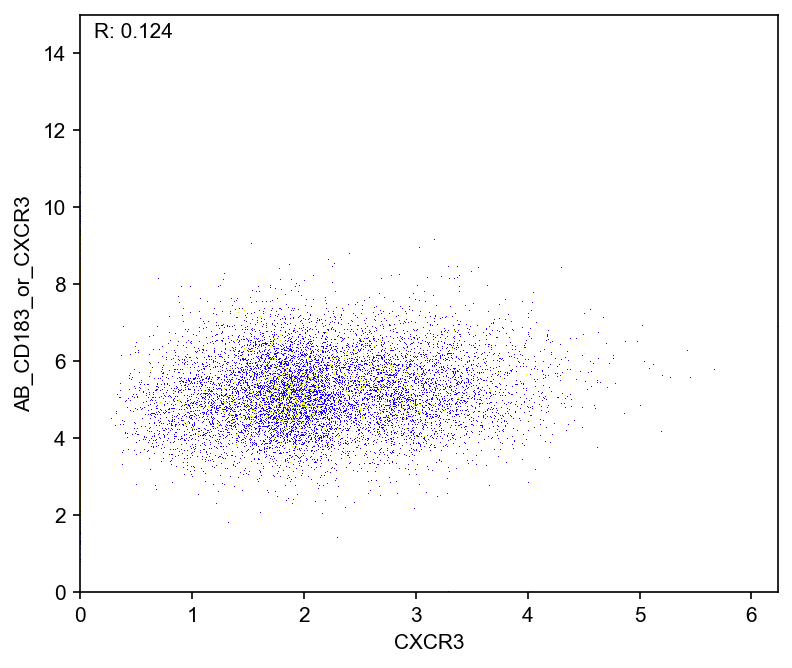

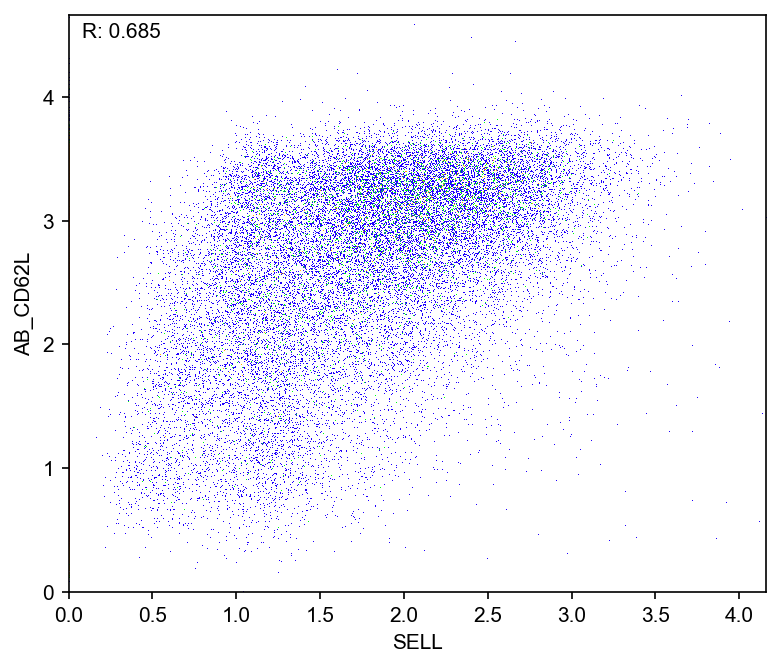

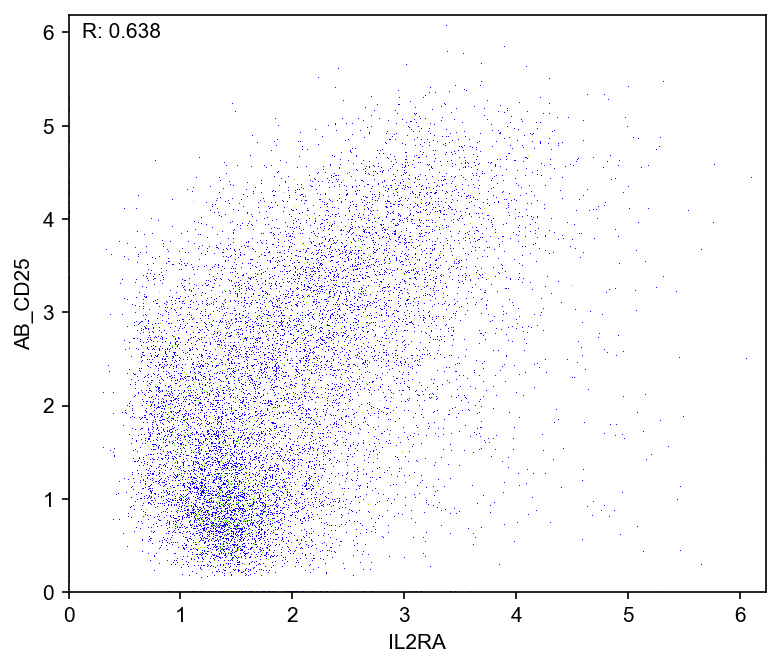

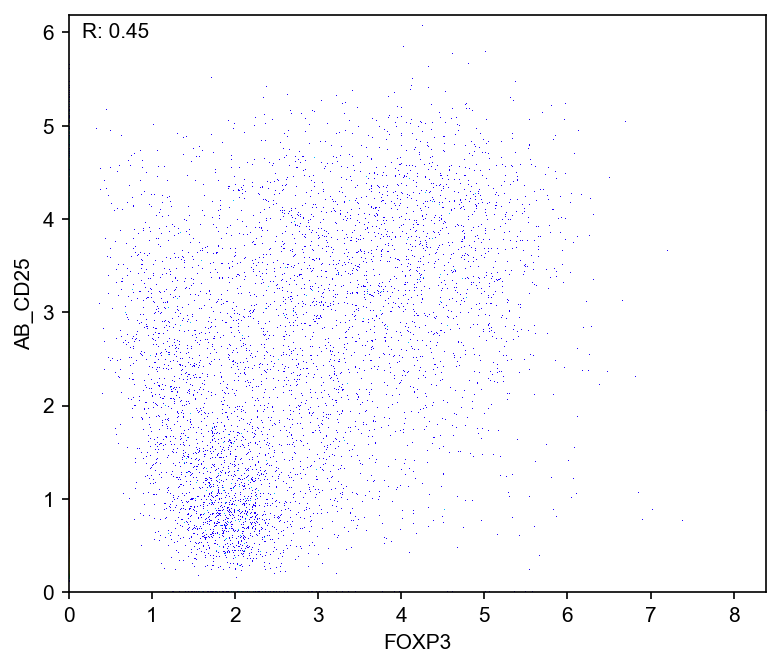

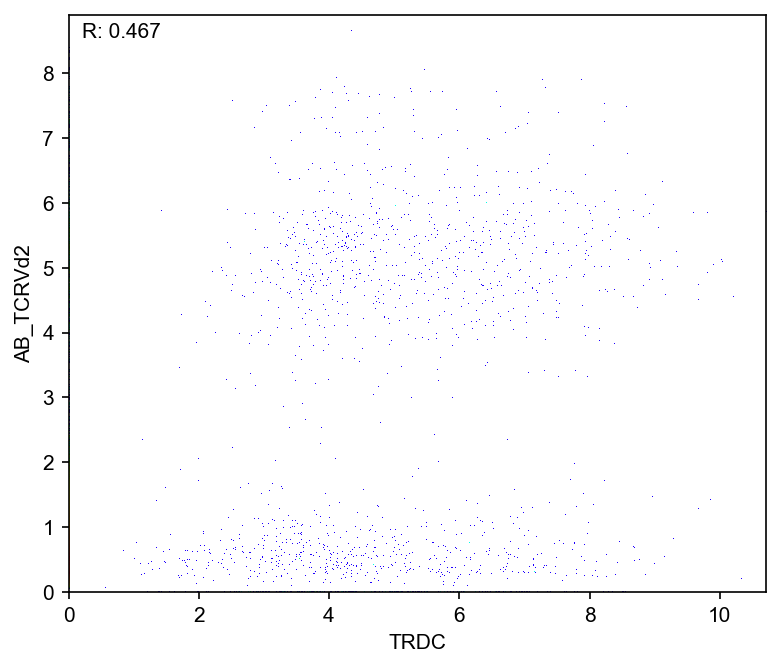

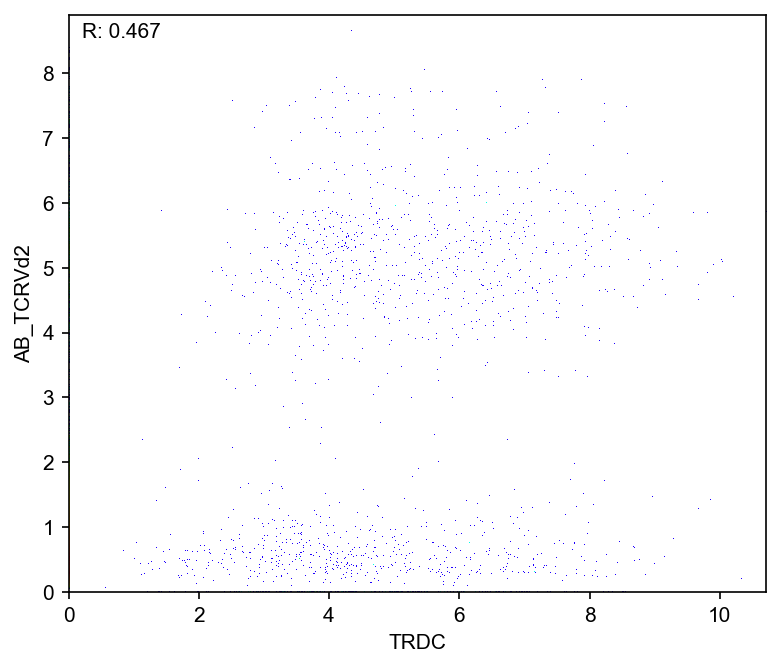

In [47]:
for (gene, prot) in prot_pairs:
    # print(gene, prot)
    r, _ = pearsonr(unsmoothed_markers[gene], unsmoothed_markers[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':unsmoothed_markers[gene], 'y':unsmoothed_markers[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(gene)
    ax.set_ylabel(prot)

Compare proteins - MAGIC to non-smoothed

In [48]:
prot_pairs

[('CCR4', 'AB_CD194_or_CCR4'),
 ('CCR6', 'AB_CD196_or_CCR6'),
 ('CXCR3', 'AB_CD183_or_CXCR3'),
 ('SELL', 'AB_CD62L'),
 ('IL2RA', 'AB_CD25'),
 ('FOXP3', 'AB_CD25'),
 ('TRDC', 'AB_TCRVd2'),
 ('TRDC', 'AB_TCRVd2')]

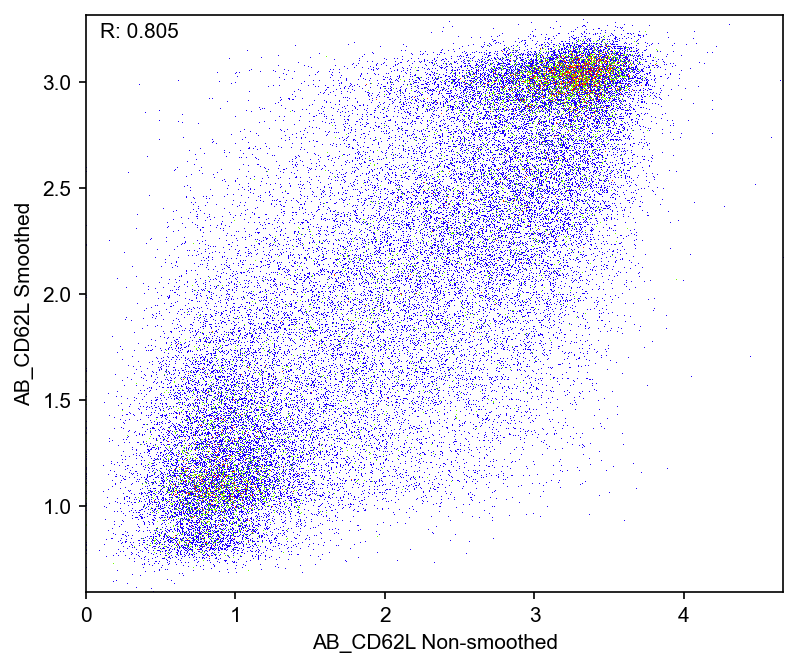

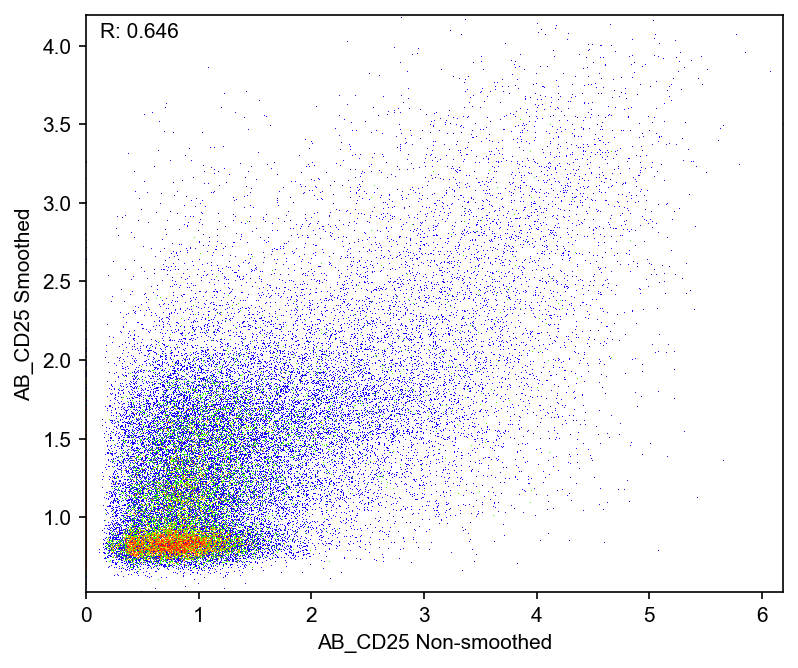

In [49]:
for prot in ['AB_CD62L', 'AB_CD25']:
    r, _ = pearsonr(unsmoothed_markers[prot], markers_magic[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':unsmoothed_markers[prot], 'y':markers_magic[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(prot + ' Non-smoothed')
    ax.set_ylabel(prot + ' Smoothed')

# Lineage marker gating - RNA and proteins

Use both RNA and proteins to gate, including various combinations of CCR7, SELL, CD197, and CD62L.

In [50]:
cmap = plt.cm.hsv
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)
    
def gate(data, g1, g2, ind=None, vertical_gate=None, horizontal_gate=None, quadrant_gate=None,
         labfontsize=9, plot_labeled=False, upper_only=False):
    
    
    
    fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
    gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
    ax = fig.add_subplot(gs[0])

    if ind  is None:
        ind = pd.Series(np.array([True]*data.shape[0]), data.index)
    
    
    x = data.loc[ind, g1]
    y = data.loc[ind, g2]
    
    dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    ax.set_xlabel(g1, fontsize=labfontsize)
    ax.set_ylabel(g2, fontsize=labfontsize)

    
    if vertical_gate is not None:
        xlim = ax.get_xlim()
        ax.hlines(y=vertical_gate['vthresh'], xmin=xlim[0], xmax=xlim[1], linestyle='--', color='k', linewidth=1)
        ax.set_xlim(xlim)
        
            
        initial_res = (data.loc[ind, g2]>vertical_gate['vthresh']).replace({True:vertical_gate['above_name'], False:vertical_gate['below_name']})
        final_res = ind.copy()
        final_res.loc[ind] = initial_res
        final_res.loc[~ind] = np.nan
    elif horizontal_gate is not None:
        ylim = ax.get_ylim()
        ax.vlines(x=horizontal_gate['hthresh'], ymin=ylim[0], ymax=ylim[1], linestyle='--', color='k', linewidth=1)
        ax.set_ylim(ylim)
        
        initial_res = (data.loc[ind, g1]>horizontal_gate['hthresh']).replace({False:horizontal_gate['left_name'], True:horizontal_gate['right_name']})
        final_res = ind.copy()
        final_res.loc[ind] = initial_res
        final_res.loc[~ind] = np.nan
        
        
    elif quadrant_gate is not None:
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        if not upper_only:
            ax.hlines(y=quadrant_gate['vthresh'], xmin=xlim[0]-1, xmax=xlim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_xlim(xlim)
            ax.vlines(x=quadrant_gate['hthresh'], ymin=ylim[0]-1, ymax=ylim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_ylim(ylim)
        else:
            ax.hlines(y=quadrant_gate['vthresh'], xmin=quadrant_gate['hthresh'], xmax=xlim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_xlim(xlim)
            ax.vlines(x=quadrant_gate['hthresh'], ymin=quadrant_gate['vthresh'], ymax=ylim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_ylim(ylim)            
            

        indh = data.loc[ind, g1]> quadrant_gate['hthresh']
        indv = data.loc[ind, g2]> quadrant_gate['vthresh']
        final_res = ind.replace(False,np.nan)
        for hval,vval, lab in [[False, False, quadrant_gate['ll']], [True, False, quadrant_gate['lr']], [False, True, quadrant_gate['ul']], [True, True, quadrant_gate['ur']]]:
            tolab = (indh==hval) & (indv==vval)
            final_res.loc[tolab.index[tolab]] = lab
            
            
    if plot_labeled:
        fig = plt.figure(constrained_layout=True, figsize=(2.4, 2.), dpi=200)
        gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.8, top=.92)
        ax2 = fig.add_subplot(gs[0])
        dat = pd.concat([x,y,final_res], axis=1)
        dat.columns = [g1, g2, 'label']
        for (k,g) in dat.groupby('label'):
            ax2.scatter(g[g1], g[g2], label=k, s=.5, edgecolor='None')
        ax2.legend(bbox_to_anchor=(1,1), markerscale=3, fontsize=6)
        
        
        
    return(final_res, ax)

In [51]:
gating = pd.DataFrame(index=markers_magic.index, columns=['gdT', 'MAIT', 'CD4_vs_CD8', 'Treg', 'CD4_Conv', 'CD8_Conv'])

In [52]:
markers_magic.columns

Index(['TRAC', 'TRGC1', 'TRDC', 'TRBC1', 'IL2RA', 'FOXP3', 'SELL', 'CCR7',
       'KLRB1', 'RTKN2', 'IL7R', 'PASK', 'GATA3', 'CCR4', 'STAT1', 'IRF4',
       'TBX21', 'IFNG', 'CCR5', 'CXCR3', 'CCR6', 'CCL20', 'IL4R', 'IL4',
       'STAT4', 'STAT6', 'CCR1', 'IL10', 'IL17B', 'IL17A', 'IL17F', 'IL17D',
       'IL17C', 'RORC', 'RORA', 'STAT3', 'AB_CD45RA', 'AB_CD4', 'AB_CD39',
       'AB_CD25', 'AB_CD27', 'AB_CD49b', 'AB_CD38', 'AB_TCRVa7.2',
       'AB_CD196_or_CCR6', 'AB_CD31', 'AB_TCRVd2', 'AB_CD45RO', 'AB_CD62L',
       'AB_TCRa_or_b', 'AB_CD3', 'AB_CD8', 'AB_CD195_or_CCR5', 'AB_CD18',
       'AB_CD94', 'AB_CD28', 'AB_CD161', 'AB_CD183_or_CXCR3',
       'AB_CD194_or_CCR4'],
      dtype='object')

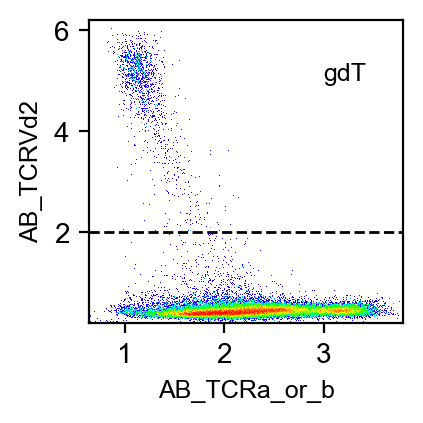

In [54]:
g1 = 'AB_TCRa_or_b'
g2 = 'AB_TCRVd2'
vgate = {'vthresh':2, 'above_name':'gdT', 'below_name':'ab'}
gating['gdT'], ax = gate(markers_magic, g1, g2, ind=None, vertical_gate=vgate, plot_labeled=False)
ax.text(3,5, 'gdT', fontsize=9)
plt.savefig(os.path.join(figdir, 'ManualGating_Stimseq_gdT.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_Stimseq_gdT.pdf'))

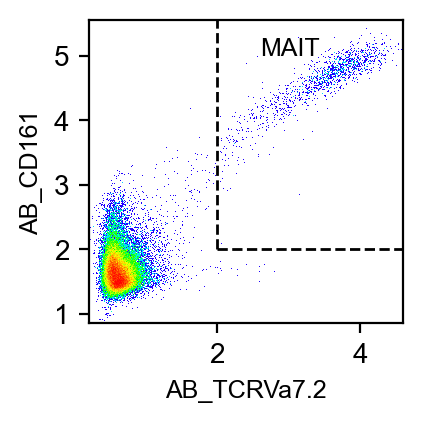

In [55]:
g1 = 'AB_TCRVa7.2'
g2 = 'AB_CD161'  
gating['MAIT'], ax = gate(markers_magic, g1, g2, ind=gating['gdT']=='ab',
                      quadrant_gate={'vthresh':2, 'hthresh':2, 'ur':'MAIT', 'ul':'ab', 'll':'ab', 'lr':'ab'}, plot_labeled=False, upper_only=True)
ax.text(2.6,5, 'MAIT', fontsize=9)
plt.savefig(os.path.join(figdir, 'ManualGating_Stimseq_MAIT.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_Stimseq_MAIT.pdf'))

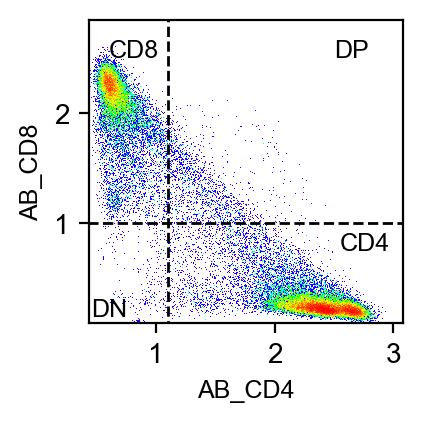

In [56]:
g1 = 'AB_CD4'
g2 = 'AB_CD8'    
gating['CD4_vs_CD8'], ax = gate(markers_magic, g1, g2, ind=gating['MAIT']=='ab', quadrant_gate={'vthresh':1, 'hthresh':1.1, 'll':'DN', 'ul':'CD8', 'ur':'DP', 'lr':'CD4'},
                            plot_labeled=False)
ax.text(.6,2.5, 'CD8', fontsize=9)
ax.text(2.55, .75, 'CD4', fontsize=9)
ax.text(2.5,2.5, 'DP', fontsize=9)
ax.text(.45, .15, 'DN', fontsize=9)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.15)
ax.set_ylim(ylim[0], ylim[1]+.25)

plt.savefig(os.path.join(figdir, 'ManualGating_Stimseq_CD4CD8.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_Stimseq_CD4CD8.pdf'))

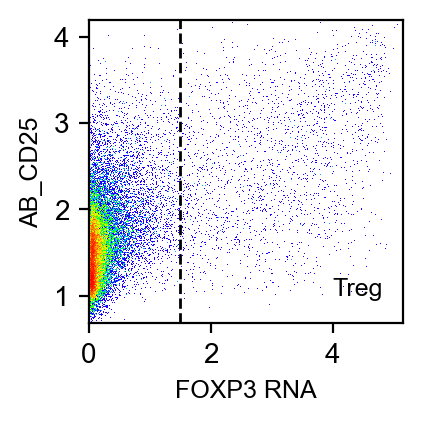

In [57]:
g2 = 'AB_CD25'     
g1 = 'FOXP3'

gating['Treg'],ax = gate(markers_magic, g1, g2, ind=gating['CD4_vs_CD8']=='CD4', horizontal_gate={'hthresh':1.5, 'right_name':'Treg', 'left_name':'CD4'},
                      plot_labeled=False)

ax.text(4, 1, 'Treg', fontsize=9)
ax.set_xlabel('FOXP3 RNA', fontsize=9)

plt.savefig(os.path.join(figdir, 'ManualGating_Stimseq_Treg.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_Stimseq_Treg.pdf'))

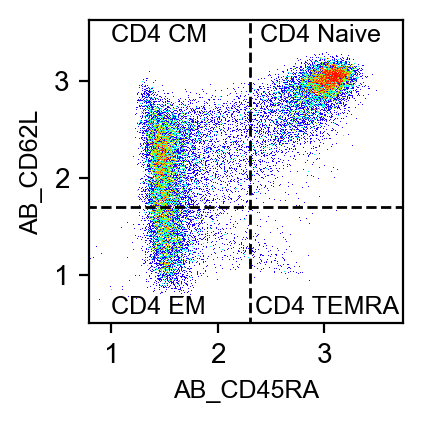

In [58]:
g1 = 'AB_CD45RA'     
g2 = 'AB_CD62L'
gating['CD4_Conv'],ax = gate(markers_magic, g1, g2, ind=(gating['Treg']=='CD4'),
                           quadrant_gate={'vthresh':1.7, 'hthresh':2.3, 'll':'CD4_EM', 'ur':'CD4_Naive', 'ul':'CD4_CM', 'lr':'CD4_TEMRA'},
                           plot_labeled=False)

ax.text(2.4, 3.4, 'CD4 Naive', fontsize=9)
ax.text(2.35, .6, 'CD4 TEMRA', fontsize=9)

ax.text(1., 3.4, 'CD4 CM', fontsize=9)
ax.text(1., .6, 'CD4 EM', fontsize=9)



xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.25)
ax.set_ylim(ylim[0]-.2, ylim[1]+.35)


plt.savefig(os.path.join(figdir, 'ManualGating_Stimseq_CD4Naive.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_Stimseq_CD4Naive.pdf'))

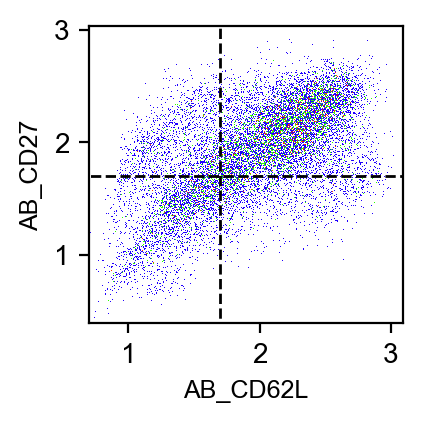

In [59]:
g1 = 'AB_CD62L'     
g2 = 'AB_CD27'
_ = gate(markers_magic, g1, g2, ind=(gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM'])), quadrant_gate={'vthresh':1.7, 'hthresh':1.7, 'll':'CD4_Memory', 'ul':'CD4_Naive', 'ur':'CD4_Memory', 'lr':'CD4_Memory'})


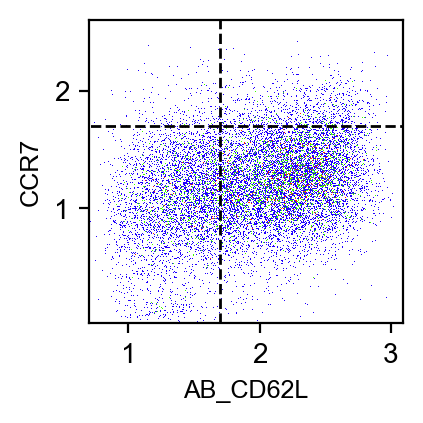

In [60]:
g1 = 'AB_CD62L'     
g2 = 'CCR7'
_ = gate(markers_magic, g1, g2, ind=(gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM'])), quadrant_gate={'vthresh':1.7, 'hthresh':1.7, 'll':'CD4_Memory', 'ul':'CD4_Naive', 'ur':'CD4_Memory', 'lr':'CD4_Memory'})


Text(0.5, 0, 'SELL RNA')

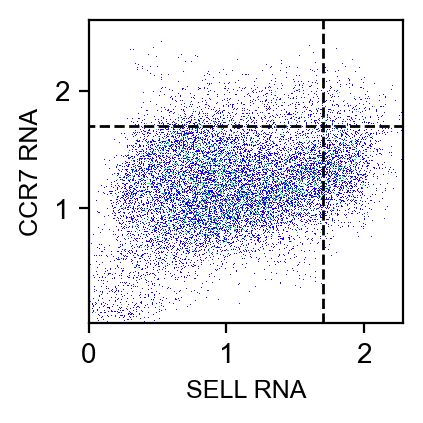

In [61]:
g1 = 'SELL'     
g2 = 'CCR7'
_,ax = gate(markers_magic, g1, g2, ind=(gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM'])), quadrant_gate={'vthresh':1.7, 'hthresh':1.7, 'll':'CD4_Memory', 'ul':'CD4_Naive', 'ur':'CD4_Memory', 'lr':'CD4_Memory'})
ax.set_ylabel('CCR7 RNA', fontsize=9)
ax.set_xlabel('SELL RNA', fontsize=9)

(3_AAACCTGAGACCGGAT    CD4_Memory
 3_AAACCTGAGAGGGCTT           NaN
 3_AAACCTGAGAGTCTGG    CD4_Memory
 3_AAACCTGAGCTAGCCC    CD4_Memory
 3_AAACCTGAGCTGCCCA    CD4_Memory
                          ...    
 2_TTTGTCATCAGGCCCA    CD4_Memory
 2_TTTGTCATCATATCGG           NaN
 2_TTTGTCATCATTATCC           NaN
 2_TTTGTCATCGGCTACG           NaN
 2_TTTGTCATCTCCAGGG           NaN
 Name: CD4_Conv, Length: 43222, dtype: object,
 <AxesSubplot:xlabel='AB_CD62L', ylabel='AB_CD27'>)

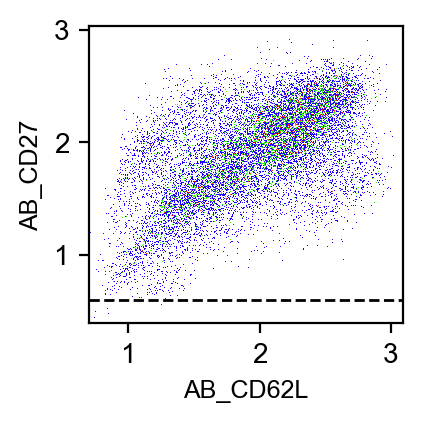

In [62]:
g1 = 'AB_CD62L'
g2 = 'AB_CD27'     
gate(markers_magic, g1, g2, ind=(gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM'])),
                                   vertical_gate={'vthresh':.6, 'above_name':'CD4_Memory', 'below_name':'CD4_TerminalEffector'},
                                   plot_labeled=False)

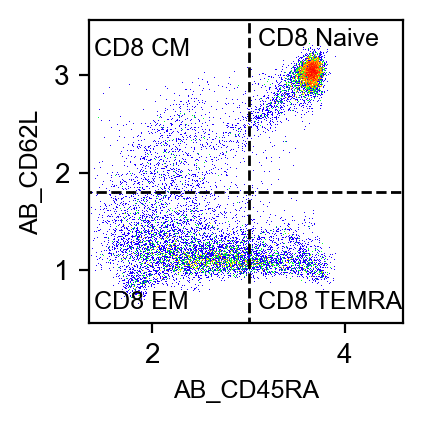

In [63]:
g1 = 'AB_CD45RA'     
g2 = 'AB_CD62L'
gating['CD8_Conv'], ax = gate(markers_magic, g1, g2, ind=(gating['CD4_vs_CD8']=='CD8'),
                           quadrant_gate={'vthresh':1.8, 'hthresh':3, 'll':'CD8_EM', 'ul':'CD8_CM', 'ur':'CD8_Naive', 'lr':'CD8_TEMRA'},
                                                             plot_labeled=False)

ax.text(3.1, 3.3, 'CD8 Naive', fontsize=9)
ax.text(3.1, .6, 'CD8 TEMRA', fontsize=9)

ax.text(1.4, 3.2, 'CD8 CM', fontsize=9)
ax.text(1.4, .6, 'CD8 EM', fontsize=9)



xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.7)
ax.set_ylim(ylim[0]-.2, ylim[1]+.25)


plt.savefig(os.path.join(figdir, 'ManualGating_Stimseq_CD8Naive.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_Stimseq_CD8Naive.pdf'))

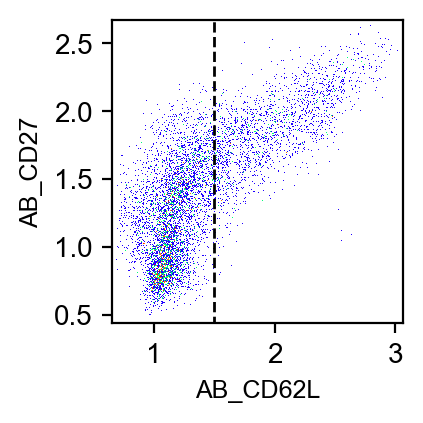

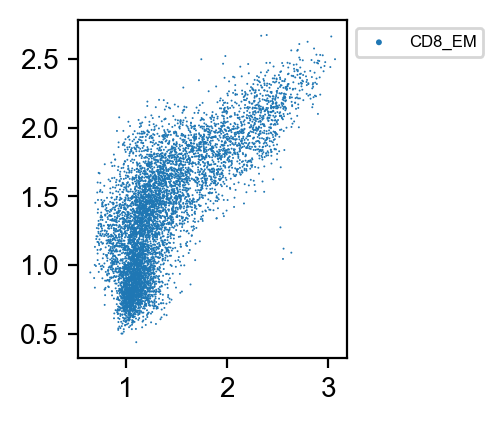

In [64]:
g1 = 'AB_CD62L'   
g2 = 'AB_CD27'     
_ = gate(markers_magic, g1, g2, ind=(gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])), quadrant_gate={'vthresh':4.4, 'hthresh':1.5, 'll':'CD8_EM', 'lr':'CD8_EM',
                                                                                    'ul':'CD8_EM', 'ur':'CD8_CM'}, plot_labeled=True)


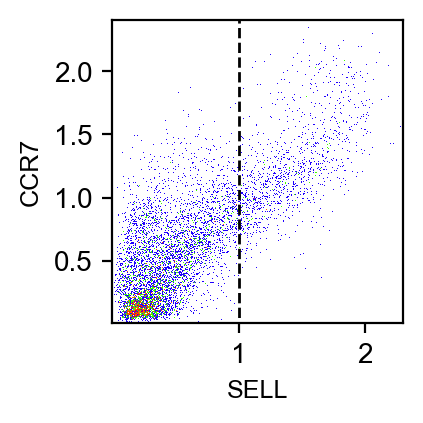

In [65]:
g1 = 'SELL'   
g2 = 'CCR7'     
_ = gate(markers_magic, g1, g2, ind=(gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])), quadrant_gate={'vthresh':4.4, 'hthresh':1, 'll':'CD8_EM', 'lr':'CD8_EM',
                                                                                    'ul':'CD8_EM', 'ur':'CD8_CM'}, plot_labeled=False)


In [66]:
label = gating.apply(lambda x: x[x.last_valid_index()], axis=1)

In [67]:
label.value_counts()

CD4_CM       9486
CD4_Naive    8917
CD8_EM       5565
CD8_Naive    4868
CD4_EM       4428
Treg         2073
CD8_TEMRA    1752
DP           1535
gdT          1508
MAIT         1428
CD8_CM       1219
DN            292
CD4_TEMRA     151
dtype: int64

In [68]:
outfn = os.path.join(outdir, 'ManualGating.Magic.20230831.tsv')
print(outfn)

../../../Data/PerDataset/Stimseq/ManualGating.Magic.20230831.tsv


In [69]:
gating.to_csv(outfn, sep='\t')

In [70]:
outfn = os.path.join(outdir, 'ManualGating.Magic.FinalLabel.20230831.tsv')
print(outfn)

../../../Data/PerDataset/Stimseq/ManualGating.Magic.FinalLabel.20230831.tsv


In [71]:
label.to_csv(outfn, sep='\t')

## Associate lineage abundance with stimulation condition

In [76]:
metafn = '../../../Data/PerDataset/Stimseq/stimseq.pilot2.metadata.tsv'
meta = pd.read_csv(metafn, sep='\t', index_col=0)
meta.head()

/tmp/ipykernel_65187/1290630865.py:2: DtypeWarning: Columns (2,26) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(metafn, sep='\t', index_col=0)


,barcode,BRI,Run,Well,Batch,Biobank_ID,Sort_Status,HTO_Status,Demuxlet_Assignment,Total_RNA_Count,...,A_Num_Productive_In_Barcode,A_Has_Unproductive,B_Possible_TCR_Doublet,A_Possible_TCR_Doublet,DEMUX_BEST_Category,Hashtag1,Hashtag2,Hashtag3,n_counts,leiden
3_AAACCTGAGACCGGAT,AAACCTGAGACCGGAT-1,2248_hashing,2,1,3,10042029,+,Hashtag3 (+),SNG,1443,...,NaN,NaN,NaN,NaN,SNG,8,19,4305,1443.0,7
3_AAACCTGAGAGGGCTT,AAACCTGAGAGGGCTT-1,2248_hashing,2,1,3,10057029,U,Hashtag1 (U),SNG,3508,...,1.0,True,Productive Singleton,Productive Singleton,SNG,391,61,138,3508.0,4
3_AAACCTGAGAGTCTGG,AAACCTGAGAGTCTGG-1,2248_hashing,2,1,3,10049452,+,Hashtag3 (+),SNG,18799,...,1.0,False,Productive Singleton,Productive Singleton,SNG,9,55,5301,18794.0,0
3_AAACCTGAGCTAGCCC,AAACCTGAGCTAGCCC-1,2248_hashing,2,1,3,10042029,U,Hashtag1 (U),SNG,4133,...,0.0,True,Productive Singleton,Unproductive Singleton,SNG,1477,50,153,4133.0,4
3_AAACCTGAGCTGCCCA,AAACCTGAGCTGCCCA-1,2248_hashing,2,1,3,10057029,+,Hashtag3 (+),SNG,10485,...,1.0,False,Productive Singleton,Productive Singleton,SNG,17,39,8338,10483.0,0


In [79]:
meta['Gating'] = label.loc[meta.index]

In [81]:
metanewfn = '../../../Data/PerDataset/Stimseq/stimseq.pilot2.metadata.withgating.tsv'
meta.to_csv(metanewfn, sep='\t')

## Make lineage association plots

In [8]:
metanewfn = '../../../Data/PerDataset/Stimseq/stimseq.pilot2.metadata.withgating.tsv'
meta = pd.read_csv(metanewfn, sep='\t', index_col=0)

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (2,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
from scipy.stats import ttest_rel

def ttest_all_cols(X, Y):
    Ts = []
    Ps = []
    for g in X.columns:
        T, P = ttest_rel(X[g], Y[g])
        Ts.append(T)
        Ps.append(P)

    Ts = pd.Series(Ts, index=X.columns)
    Ps = pd.Series(Ps, index=X.columns)
    return(Ts, Ps)


def permute_within_group(df, group_col, vartopermute):
    permuted = df.groupby(group_col, group_keys=True).apply(lambda x: x.assign(permuted=np.random.permutation(x[vartopermute]))).reset_index(drop=True)
    return(permuted)

In [10]:
fortest = meta[['Biobank_ID', 'Sort_Status', 'Gating']]
fortest = fortest.loc[fortest['Sort_Status']!='-', :]
lineage_count = pd.crosstab([fortest['Biobank_ID'], fortest['Sort_Status']], fortest['Gating'])
lineage_count_frac = lineage_count.div(lineage_count.sum(axis=1), axis=0)
Ts,Ps = ttest_all_cols(lineage_count_frac.xs('+', axis=0, level=1),
               lineage_count_frac.xs('U', axis=0, level=1))
Ts_abs = Ts.abs()
nperms=1000
permuteP = pd.Series(0, Ps.index)
for i in range(nperms):
    if i % 50 == 0:
        print('%d out of %d' % (i+1, nperms))
    permuted = permute_within_group(fortest, 'Biobank_ID', 'Sort_Status')
    lineage_count_perm = pd.crosstab([permuted['Biobank_ID'], permuted['permuted']], permuted['Gating'])
    lineage_count_perm_frac = lineage_count_perm.div(lineage_count_perm.sum(axis=1), axis=0)
    Trand,Prand = ttest_all_cols(lineage_count_perm_frac.xs('+', axis=0, level=1),
               lineage_count_perm_frac.xs('U', axis=0, level=1))
    permuteP += (Trand.abs()>=Ts_abs).astype(int)

1 out of 1000
51 out of 1000
101 out of 1000
151 out of 1000
201 out of 1000
251 out of 1000
301 out of 1000
351 out of 1000
401 out of 1000
451 out of 1000
501 out of 1000
551 out of 1000
601 out of 1000
651 out of 1000
701 out of 1000
751 out of 1000
801 out of 1000
851 out of 1000
901 out of 1000
951 out of 1000


In [11]:
permuteP /= nperms

Text(0, 0.5, '-log10 Permutation P-value')

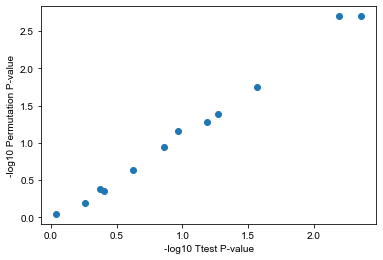

In [12]:
plt.scatter(Ps.apply(np.log10)*-1, permuteP.apply(np.log10)*-1)
plt.xlabel('-log10 Ttest P-value')
plt.ylabel('-log10 Permutation P-value')

In [13]:
fortest = meta[['Biobank_ID', 'Sort_Status', 'Gating']]
fortest = fortest.loc[fortest['Sort_Status']!='+', :]
lineage_count = pd.crosstab([fortest['Biobank_ID'], fortest['Sort_Status']], fortest['Gating'])
lineage_count_frac = lineage_count.div(lineage_count.sum(axis=1), axis=0)
T_neg,P_neg = ttest_all_cols(lineage_count_frac.xs('-', axis=0, level=1),
               lineage_count_frac.xs('U', axis=0, level=1))

In [14]:
fortest = meta[['Biobank_ID', 'Sort_Status', 'Gating']]
fortest = fortest.loc[fortest['Sort_Status']!='-', :]
lineage_count = pd.crosstab([fortest['Biobank_ID'], fortest['Sort_Status']], fortest['Gating'])
lineage_count_frac = lineage_count.div(lineage_count.sum(axis=1), axis=0)
T_pos,P_pos = ttest_all_cols(lineage_count_frac.xs('+', axis=0, level=1),
               lineage_count_frac.xs('U', axis=0, level=1))

In [15]:
fortest = meta[['Biobank_ID', 'Sort_Status', 'Gating']]
fortest = fortest.loc[fortest['Sort_Status']!='U', :]
lineage_count = pd.crosstab([fortest['Biobank_ID'], fortest['Sort_Status']], fortest['Gating'])
lineage_count_frac = lineage_count.div(lineage_count.sum(axis=1), axis=0)
T_posmin,P_posmin = ttest_all_cols(lineage_count_frac.xs('+', axis=0, level=1),
               lineage_count_frac.xs('-', axis=0, level=1))

In [16]:
P_neg

Gating
CD4_CM       0.139143
CD4_EM       0.104365
CD4_Naive    0.238020
CD4_TEMRA    0.379448
CD8_CM       0.690285
CD8_EM       0.422436
CD8_Naive    0.040741
CD8_TEMRA    0.935280
DN           0.756258
DP           0.317489
MAIT         0.847477
Treg         0.709029
gdT          0.141267
dtype: float64

In [17]:
P_pos

Gating
CD4_CM       0.004413
CD4_EM       0.053756
CD4_Naive    0.027079
CD4_TEMRA    0.392886
CD8_CM       0.064883
CD8_EM       0.906634
CD8_Naive    0.000860
CD8_TEMRA    0.424438
DN           0.236131
DP           0.139028
MAIT         0.108790
Treg         0.006409
gdT          0.552780
dtype: float64

In [18]:
P_posmin

Gating
CD4_CM       0.001464
CD4_EM       0.025864
CD4_Naive    0.089046
CD4_TEMRA    0.407121
CD8_CM       0.011979
CD8_EM       0.812220
CD8_Naive    0.000463
CD8_TEMRA    0.447611
DN           0.103557
DP           0.054185
MAIT         0.002148
Treg         0.005926
gdT          0.297405
dtype: float64

In [19]:
meta['Sort_Status'] = meta['Sort_Status'].replace({'U':'M'})
cmap = {'M':sns.color_palette('colorblind')[1], '-':sns.color_palette('colorblind')[2], '+':sns.color_palette('colorblind')[3]}


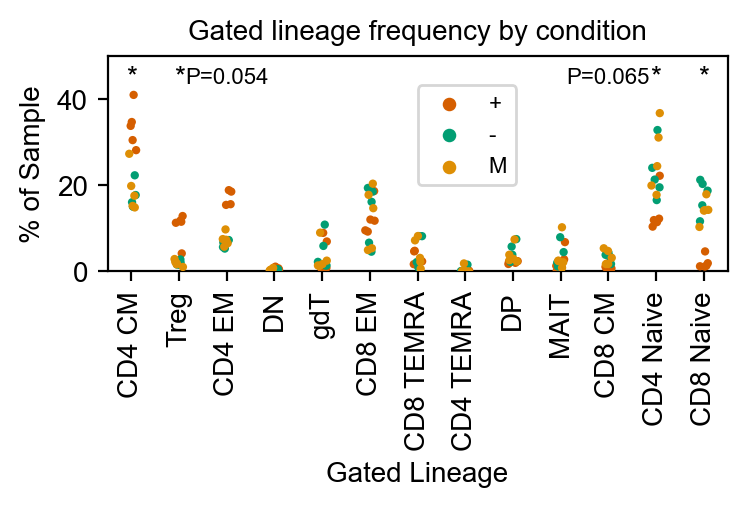

In [32]:
fortest = meta[['Biobank_ID', 'Sort_Status', 'Gating']].rename(columns={'Sort_Status':'Condition'})
lineage_count = pd.crosstab([fortest['Biobank_ID'], fortest['Condition']], fortest['Gating'])
lineage_count_frac = lineage_count.div(lineage_count.sum(axis=1), axis=0)
lineage_count_frac_flat = lineage_count_frac.unstack().unstack().reset_index()
lineage_count_frac_flat[0] = lineage_count_frac_flat[0]*100

order = T_pos.sort_values(ascending=False).index
(fig,ax) = plt.subplots(1,1,figsize=(4,2.5), dpi=200, gridspec_kw={'bottom':.45})
sns.stripplot(x='Gating', y=0, hue='Condition', data=lineage_count_frac_flat, order=order, ax=ax, size=3, palette=cmap)
ax.set_xticklabels([x.replace('_', ' ') for x in order], rotation=90, fontsize=10)
ax.set_ylim([0,50])
ax.set_ylabel('% of Sample', fontsize=10)
ax.set_xlabel('Gated Lineage', fontsize=10)
ax.set_title('Gated lineage frequency by condition', fontsize=10)
ax.legend(loc=(.5, .4), markerscale=.5, fontsize=8)

for i,P in enumerate(P_pos.loc[order]):
    if P<.05:
        ax.text(i, 45, '*', ha='center', va='center')
    elif i == 2:
        ax.text(i, 45, 'P=%.3f' % P, ha='center', va='center', fontsize=8)
    elif i == 10:
        ax.text(i, 45, 'P=%.3f' % P, ha='center', va='center', fontsize=8)


plt.savefig(os.path.join(figdir, 'Stimseq_GatingFrequency.png'))
plt.savefig(os.path.join(figdir, 'Stimseq_GatingFrequency.pdf'))

In [27]:
order

Index(['CD4_CM', 'Treg', 'CD4_EM', 'DN', 'gdT', 'CD8_EM', 'CD8_TEMRA',
       'CD4_TEMRA', 'DP', 'MAIT', 'CD8_CM', 'CD4_Naive', 'CD8_Naive'],
      dtype='object', name='Gating')

In [21]:
ct = pd.crosstab(fortest['Condition'], fortest['Gating'])
ct.div(ct.sum(axis=1), axis=0)*100

Gating,CD4_CM,CD4_EM,CD4_Naive,CD4_TEMRA,CD8_CM,CD8_EM,CD8_Naive,CD8_TEMRA,DN,DP,MAIT,Treg,gdT
Condition,,,,,,,,,,,,,
+,34.042219,17.295770,11.771168,0.109864,1.153575,11.480813,1.388998,2.683826,0.721965,2.016794,2.699521,11.747626,2.887860
-,16.591841,6.343939,23.495348,0.383890,3.578632,13.956666,16.806559,4.821394,0.377383,4.274839,3.259809,1.978008,4.131694
M,17.337635,6.922430,25.319119,0.519007,3.415626,13.431056,14.518165,4.657035,0.329640,4.116987,4.053864,1.886660,3.492776


In [31]:
lineage_count_frac_flat[0] = lineage_count_frac_flat[0]*100

,Gating,Condition,Biobank_ID,0
0,CD4_CM,+,10033066,0.410300
1,CD4_CM,+,10041243,0.347222
2,CD4_CM,+,10042029,0.338228
3,CD4_CM,+,10049452,0.281782
4,CD4_CM,+,10057029,0.305149
...,...,...,...,...
190,gdT,U,10033066,0.013614
191,gdT,U,10041243,0.024851
192,gdT,U,10042029,0.016746
193,gdT,U,10049452,0.089912
